# phys381 assorted topics possibly related to midterm

## pyplot


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

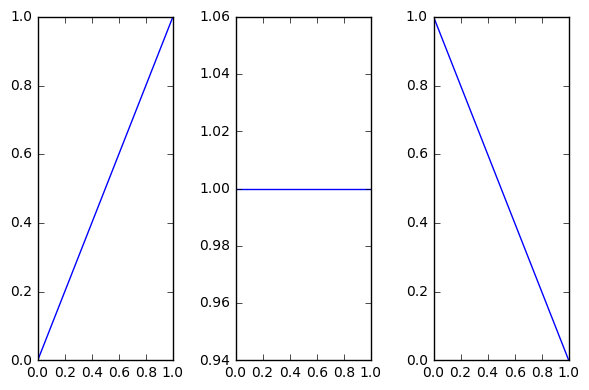

In [102]:
# Stack 3 plots horizontally
#
fig, ax = plt.subplots( 1,3 )

ax[0].plot([0,1])
ax[1].plot([1,1])
ax[2].plot([1,0])

# Note that the y-axis labels for the 2nd and 3rd plot will overlap 
# with their neighbors to the left unless we use the following tweak:
fig.tight_layout()

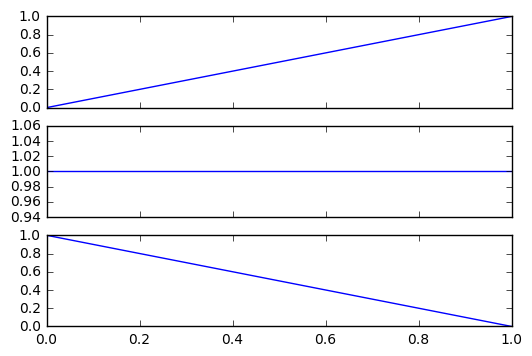

In [94]:
#Stack 3 plots vertically, sharing a common x-axis so the labels only appear once.
#
fig, ax = plt.subplots(3,1, sharex=True)
ax[0].plot([0,1])
ax[1].plot([1,1])
ax[2].plot([1,0])

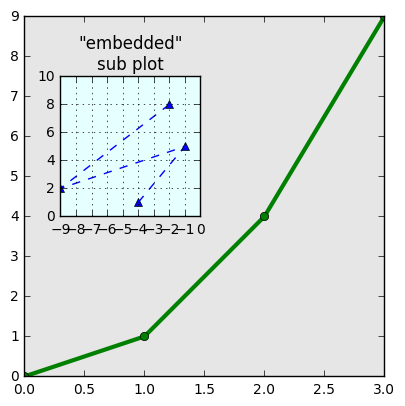

In [80]:
# When we call "plt.plot" it will generate a "figure" and set of "axes".
# We could also do this ourselves
#
fig = plt.figure( num=0, figsize=(4,4), facecolor='white' )
ax = plt.axes([0.1, 0.1, 0.9, 0.9], axisbg=(0.9,0.9,0.9) )
plt.plot( [0,1,2,3], [0,1,4,9], 'go-', linewidth=3 )

# create a new plot on the existing figure:
#
ax1 = plt.axes([0.19, 0.50, 0.35, 0.35], axisbg=(0.9,1.0,1.0) )  # left, bottom, width, height
ax1.axis([-9,0,0,10])  # xmin, xmax, ymin, ymax
plt.plot( [-2,-9,-1,-4],[8,2,5,1], 'b^--')
plt.grid('on')
plt.title('"embedded"\nsub plot')

## data structures

In [86]:
mytuple = (0, 1, 2, 'fred')  # or tuple()
mylist = [0, 1, 2, 'wilma']  # or list()
mydict = {0:99, 1:-1, '2':0, 'barney':() } # or dict()
myset = set([0, 1, 'fred'])

In [88]:
print('mytuple: ', mytuple[0], mytuple[-1] )
print('mylist: ', mylist[0], mylist[-1])
print('mydict: ', mydict[0], mydict['2'])
print('myset:', myset)

mytuple:  0 fred
mylist:  0 wilma
mydict:  99 0
myset: {0, 1, 'fred'}


In [89]:
mydict[0] = 98
mydict.update( dict(mylist=[]) )
print(mydict)

{0: 98, 1: -1, 'mylist': [], 'barney': (), '2': 0}


In [90]:
#print( mydict['chewbacca'])  # <-- this will crash
print( mydict['chewbacca'] if 'chewbaccca' in mydict else 'unknown' )
print( mydict.get('chewbacca', None) )


unknown
None


## numpy

Make a quick toy ODE to integrate numerically.

In [55]:
import numpy as np
import scipy.integrate as integrate


def acceleration(position, velocity):
    return -position*position - 0.001*np.abs(velocity)

def ode_integrand(state, time):
    position, velocity = state[0:2], state[2:4]
    
    accel = acceleration(position, velocity)
    return [velocity[0], velocity[1], accel[0], accel[1]]

state0 = [1.0, 0.0, -2.0, +3.0]
timevals = np.linspace(0.0, 2.0, 121)
state_trajectory = integrate.odeint( ode_integrand, state0, timevals )

In [56]:
# Look at some numbers.
#
print( 'first few: ', state_trajectory[0:4] )
print( 'last few: ', state_trajectory[-4:] )

first few:  [[ 1.          0.         -2.          3.        ]
 [ 0.96653056  0.04999952 -2.01614927  2.99993613]
 [ 0.93280103  0.0999974  -2.03121633  2.99978892]
 [ 0.89882919  0.14999156 -2.04523112  2.99947506]]
last few:  [[ -5.92354274   0.82277548 -11.97083425  -2.93662478]
 [ -6.12804345   0.77374098 -12.57609778  -2.94729782]
 [ -6.34298404   0.72453926 -13.22421715  -2.95670423]
 [ -6.56910979   0.67519079 -13.91898248  -2.96492074]]


In [83]:
# What exactly is the ODE integrator returning?
#
print('type: ', type(state_trajectory) )
print('shape: ', state_trajectory.shape)
print('dtype: ', state_trajectory.dtype)

type:  <class 'numpy.ndarray'>
shape:  (121, 4)
dtype:  float64


In [63]:
x, v = state_trajectory[:,0:2], state_trajectory[:,2:4]
print( x.shape, v.shape )

(121, 2) (121, 2)


In [64]:
displacement = np.sqrt( np.sum( x**2, axis=1 )) 
speed = np.sqrt( np.sum( v**2, axis=1 ) )
print( displacement.shape, speed.shape )

(121,) (121,)


In [66]:
unitv = v / speed.reshape(-1,1)  # reshape(121,1)
print( unitv.shape )

(121, 2)


In [71]:
# Transpose array for more convenient access
#
state = state_trajectory.T
x0, v0 = state[0:2, :], state[2:4, :]
x1, v1 = state[0:2], state[2:4]
x2, v2 = state.reshape(2,2,-1)

In [76]:
print(x0.shape, v0.shape)
assert( np.all(x0==x1) )
assert( np.all(x0==x2) )
assert( np.all(v0==v1) )
assert( np.all(v0==v2) )

(2, 121) (2, 121)


In [79]:
unitv0 = v0 / np.sqrt( np.sum(v0*v0, axis=0) )
print( unitv0.shape )

(2, 121)
